In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Delivery dataset

In [2]:
delivery = pd.read_csv('data/deliveries.csv')

In [3]:
print(delivery.info())
print()
delivery.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB
None



,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92


In [4]:
for col in delivery.columns:
    delivery[col] = pd.to_datetime(delivery[col])

In [5]:
delivery['period'] = delivery['delivery_date'] - delivery['order_date']

In [6]:
delivery.sample(3)

,order_date,delivery_date,period
51,1991-01-11,1994-12-03,1422 days
495,1990-12-10,1992-12-16,737 days
449,1993-09-25,1998-08-09,1779 days


In [7]:
delivery['period'].median()

Timedelta('998 days 00:00:00')

In [8]:
median_days = delivery['period'].median().days
print(median_days)

998


# Google dataset

In [9]:
google = pd.read_csv('data/google.csv')
google.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897


In [10]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [11]:
google['Date'] = pd.to_datetime(google['Date'])
google.set_index('Date',inplace=True)
google.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874


In [12]:
google['month'] = google.index.month_name()
google['quarter'] = google.index.quarter
google['day_name'] = google.index.day_name()

In [13]:
google

,Open,High,Low,Close,Adj Close,Volume,month,quarter,day_name
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,3,Thursday
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,3,Friday
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,3,Monday
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,3,Tuesday
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,3,Wednesday
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,2,Monday
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,2,Tuesday
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,2,Wednesday


In [14]:
# fetching alternate days in the year 2020
google.loc['2020-01-01':'2020-12-31':2]

,Open,High,Low,Close,Adj Close,Volume,month,quarter,day_name
Date,,,,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600,January,1,Thursday
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300,January,1,Monday
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000,January,1,Wednesday
2020-01-10,1427.560059,1434.928955,1418.349976,1429.729980,1429.729980,1820700,January,1,Friday
2020-01-14,1439.010010,1441.800049,1428.369995,1430.880005,1430.880005,1558900,January,1,Tuesday
...,...,...,...,...,...,...,...,...,...
2020-12-18,1754.180054,1755.109985,1720.219971,1731.010010,1731.010010,4016400,December,4,Friday
2020-12-22,1734.430054,1737.405029,1712.574951,1723.500000,1723.500000,936700,December,4,Tuesday
2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800,December,4,Thursday


In [17]:
# Fetch partcular day say 2nd of April for every year
start = google.index.min()
end = google.index.max()

# creating a list of required dates
date_list = pd.date_range(start = start,end = end,freq=pd.DateOffset(years = 1))

google[google.index.isin(date_list)]

,Open,High,Low,Close,Adj Close,Volume,month,quarter,day_name
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,3,Thursday
2005-08-19,139.970352,140.199493,139.287918,139.477203,139.477203,11127352,August,3,Friday
2008-08-19,244.299301,248.209656,242.406403,244.334183,244.334183,6115838,August,3,Tuesday
2009-08-19,219.173477,221.669128,218.461151,221.156052,221.156052,4526905,August,3,Wednesday
2010-08-19,239.606888,240.354095,232.752579,233.111237,233.111237,7879424,August,3,Thursday
2011-08-19,248.737671,256.473663,244.513504,244.543396,244.543396,10860556,August,3,Friday
2013-08-19,427.253540,434.371857,427.124023,431.208710,431.208710,3635375,August,3,Monday
2014-08-19,583.398254,585.731873,582.401001,585.253174,585.253174,978680,August,3,Tuesday
2015-08-19,656.599976,667.000000,654.190002,660.900024,660.900024,2134100,August,3,Wednesday


## Plotting time Series Data

<Axes: xlabel='Date'>

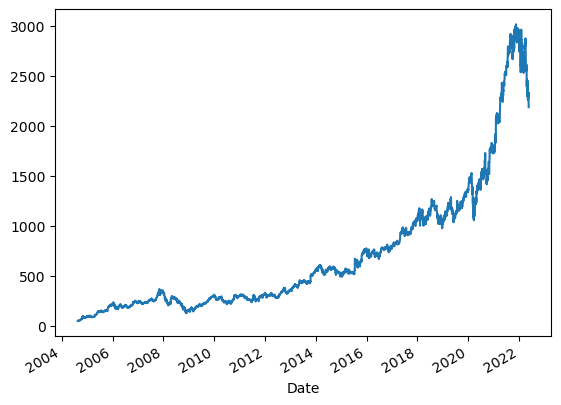

In [18]:
google['Adj Close'].plot()

array([[<Axes: title={'center': 'Adj Close'}, xlabel='Date'>,
        <Axes: title={'center': 'Volume'}, xlabel='Date'>]], dtype=object)

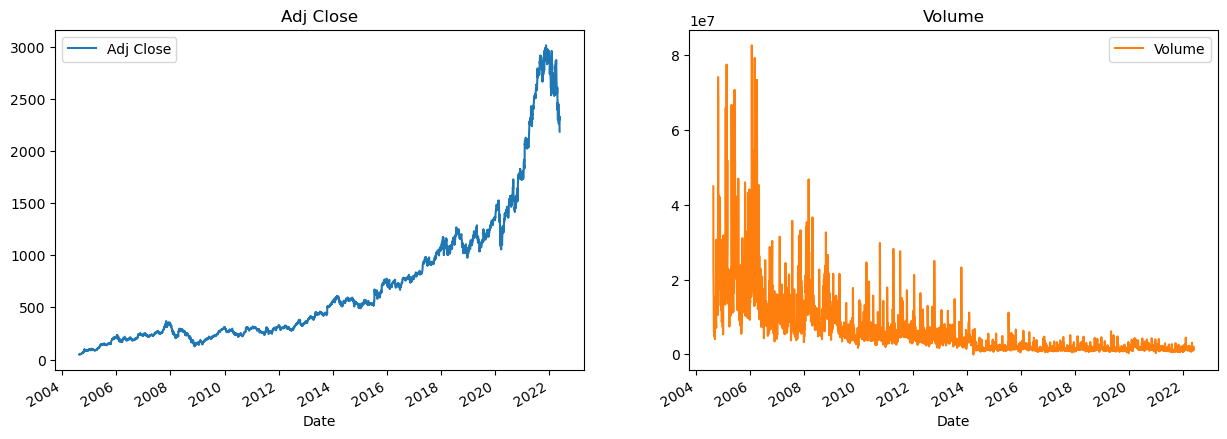

In [23]:
google[['Adj Close','Volume']].plot(subplots = True,
           layout = (1,2),
           figsize = (15,5),
           title = ['Adj Close', 'Volume'])

<Axes: xlabel='Date'>

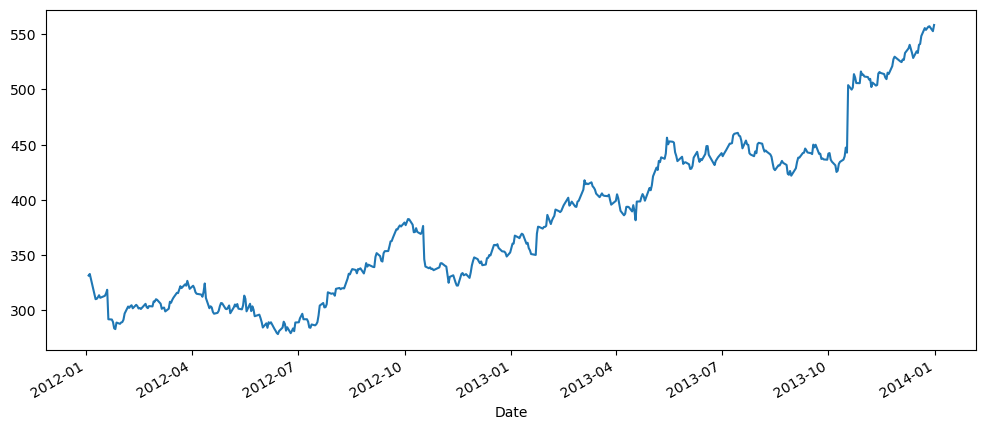

In [27]:
# Fetching and plotting particular year or set of years
google.loc['2012':'2013']['Adj Close'].plot(figsize = (12,5))

## Resampling

In [30]:
# Convert business days data to all days data and forward filling weekend by Friday data
google_daily = google.asfreq('D').fillna(method='ffill')

In [33]:
google_daily.head(10)

,Open,High,Low,Close,Adj Close,Volume,month,quarter,day_name
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,3.0,Thursday
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,3.0,Friday
2004-08-21,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,3.0,Friday
2004-08-22,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,3.0,Friday
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,3.0,Monday
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,3.0,Tuesday
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,3.0,Wednesday
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620.0,August,3.0,Thursday
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307.0,August,3.0,Friday


In [35]:
google_daily.resample('M').last()

,Open,High,Low,Close,Adj Close,Volume,month,quarter,day_name
Date,,,,,,,,,
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252.0,August,3.0,Tuesday
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,3.0,Thursday
2004-10-31,99.073647,99.601669,94.944122,94.964050,94.964050,42483644.0,October,4.0,Friday
2004-11-30,90.017593,91.158318,89.788452,90.650223,90.650223,15457723.0,November,4.0,Tuesday
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,4.0,Friday
...,...,...,...,...,...,...,...,...,...
2022-01-31,2683.959961,2716.870117,2645.479980,2713.969971,2713.969971,1702800.0,January,1.0,Monday
2022-02-28,2665.689941,2712.810059,2656.504883,2697.820068,2697.820068,1483800.0,February,1.0,Monday
2022-03-31,2848.969971,2852.889893,2792.379883,2792.989990,2792.989990,1475800.0,March,1.0,Thursday


In [39]:
google_daily.resample('Q').last()

,Open,High,Low,Close,Adj Close,Volume,month,quarter,day_name
Date,,,,,,,,,
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,3.0,Thursday
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,4.0,Friday
2005-03-31,88.642746,90.356323,88.488327,89.917969,89.917969,13587941.0,March,1.0,Thursday
2005-06-30,146.620438,148.906860,144.976593,146.525787,146.525787,30301955.0,June,2.0,Thursday
2005-09-30,156.523315,158.157181,155.561920,157.639130,157.639130,18371203.0,September,3.0,Friday
...,...,...,...,...,...,...,...,...,...
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300.0,June,2.0,Wednesday
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700.0,September,3.0,Thursday
2021-12-31,2910.879883,2927.300049,2893.550049,2893.590088,2893.590088,864900.0,December,4.0,Friday


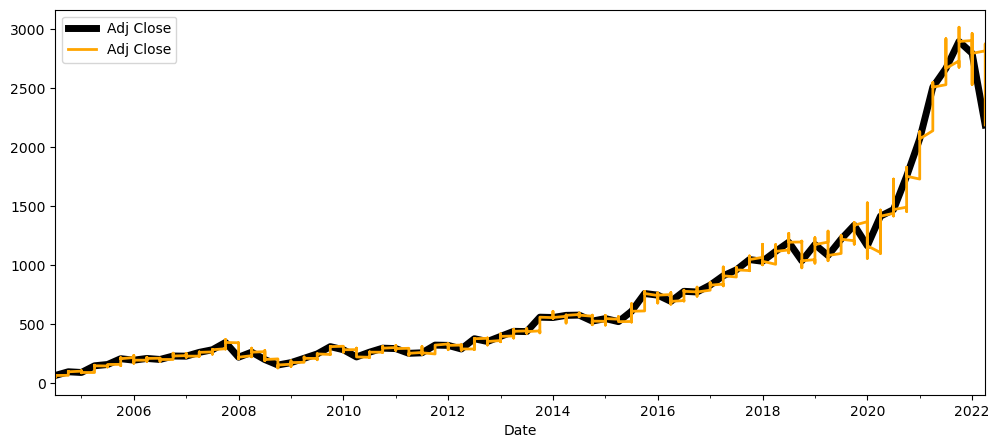

In [52]:
plt.figure(figsize = (12,5))
google_daily.resample('Q')['Adj Close'].last().plot(linewidth = 5,color = 'black')
# google_daily.resample('M')['Adj Close'].last().plot()
google['Adj Close'].plot(linewidth = 2,color = 'orange')
plt.legend()

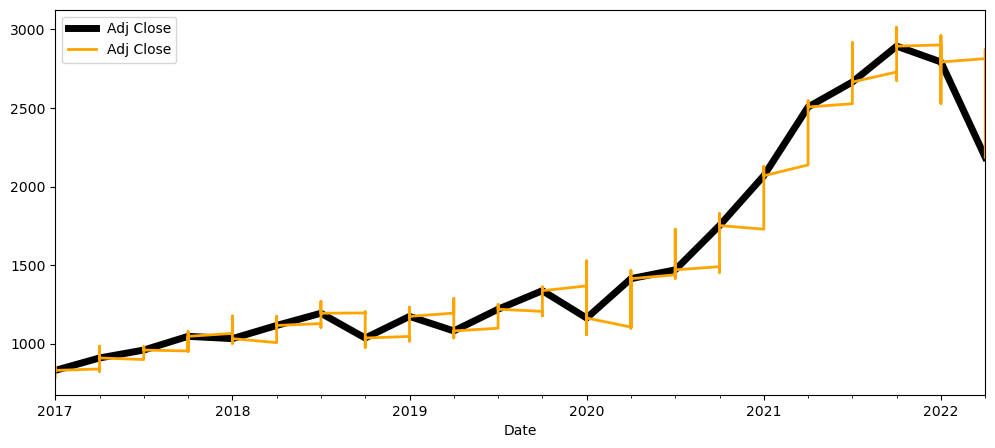

In [53]:
plt.figure(figsize = (12,5))
google_daily.loc['2017':].resample('Q')['Adj Close'].last().plot(linewidth = 5,color = 'black')
# google_daily.resample('M')['Adj Close'].last().plot()
google.loc['2017':]['Adj Close'].plot(linewidth = 2,color = 'orange')
plt.legend()

# Rolling averages --> normal and exponential weighted

<Axes: xlabel='Date'>

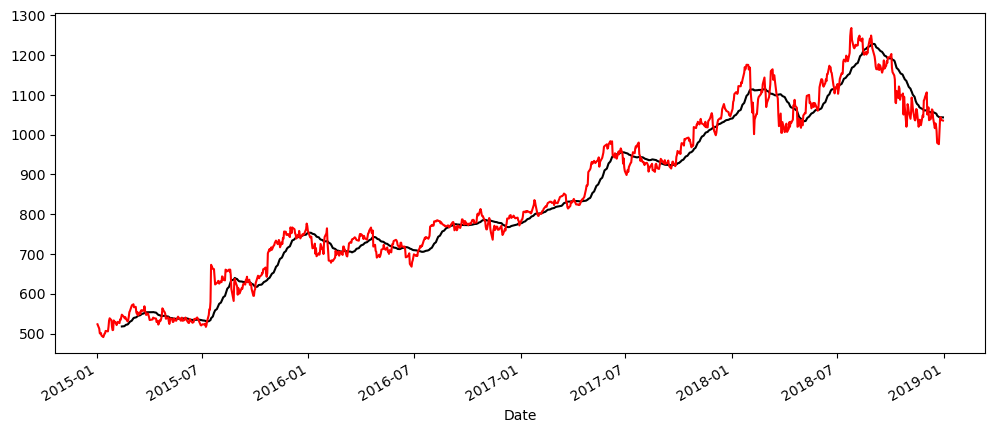

In [70]:
plt.figure(figsize = (12,5))
google.loc['2015':'2018'].rolling(30)['Adj Close'].mean().plot(color = 'black') #30 day moving average
google.loc['2015':'2018']['Adj Close'].plot(color = 'red')

<Axes: xlabel='Date'>

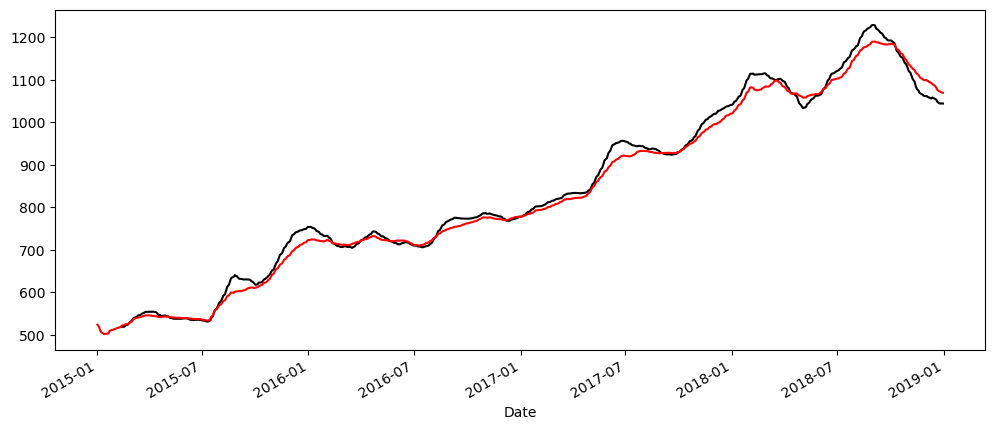

In [71]:
plt.figure(figsize = (12,5))
google.loc['2015':'2018'].rolling(30)['Adj Close'].mean().plot(color = 'black') #30 day moving average
google.loc['2015':'2018'].ewm(30)['Adj Close'].mean().plot(color = 'red')   # exponential weighted smoothening

## Shifting

In [78]:
google_2020 = google.loc['2020']

In [81]:
google_2020['adj_close_shifted'] = google_2020['Adj Close'].shift(-1)

C:\Users\abhid\AppData\Local\Temp\ipykernel_10020\402089169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_2020['adj_close_shifted'] = google_2020['Adj Close'].shift(-1)


In [82]:
google_2020

,Open,High,Low,Close,Adj Close,Volume,month,quarter,day_name,adj_close_shifted
Date,,,,,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600,January,1,Thursday,1360.660034
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400,January,1,Friday,1394.209961
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300,January,1,Monday,1393.339966
2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700,January,1,Tuesday,1404.319946
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000,January,1,Wednesday,1419.829956
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800,December,4,Thursday,1776.089966
2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000,December,4,Monday,1758.719971
2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400,December,4,Tuesday,1739.520020
